In [76]:
import gzip
import pickle
from matplotlib import pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d

In [77]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 22
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['axes.titlesize'] = 19
plt.rcParams['axes.labelpad'] = 15
plt.rcParams['xtick.labelsize'] = 19
plt.rcParams['ytick.labelsize'] = 19
plt.rcParams['legend.fontsize'] = 25
plt.rcParams['figure.titlesize'] = 19
plt.rcParams['figure.figsize'] = (8,8)
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['errorbar.capsize'] = 3.0


In [94]:
# define way to open the files
def gzipOpen(fileName):
   with gzip.open(fileName, 'rb') as f:
       
       outputObject=pickle.load(f)
   return outputObject

In [165]:
#plotting functions
def make_histogram(data, pop_vals, n_bins, min_val, max_val):
    freq, edges =np.histogram(data, bins=n_bins, weights = pop_vals, 
                             range = (min_val, max_val))
    xvals = (edges[1:] + edges[:-1]) / 2 
    return freq,xvals

def plot_1dhistogram(xvals, freq, sigma_val, color_string):
    F_vals = gaussian_filter1d(freq, sigma=sigma_val)
    plt.plot(xvals, F_vals, lw=1.75, color=xkcd_rgb[color_string])
    plt.tight_layout()
    return F_vals

def plot_wError_Range(xvals, yvals, yerr_vals, color_string, label_name):
    plt.fill_between(xvals, y1 = yvals - yerr_vals, y2 = yvals+yerr_vals,
                     color=color_string, alpha=0.4, zorder=1)
    plt.plot(xvals, yvals, color=color_string, label=label_name, zorder=2)
    plt.tight_layout()

In [226]:
# Load in the distances
m327i_apo_dists = np.concatenate(np.concatenate(gzipOpen("m327i-apo-c334-y366-dist.zip")))
wt_apo_dists = np.concatenate(np.concatenate(gzipOpen("wt-apo-c334-y366-dist.zip")))
m327v_apo_dists = np.concatenate(np.concatenate(gzipOpen("m327v-apo-c334-y366-dist.zip")))
g331r_apo_dists = np.concatenate(np.concatenate(gzipOpen("g331r-apo-c334-y366-dist.zip")))
g331d_apo_dists = np.concatenate(np.concatenate(gzipOpen("g331d-apo-c334-y366-dist.zip")))
t349m_apo_dists = np.concatenate(np.concatenate(gzipOpen("g331d-apo-c334-y366-dist.zip")))

wt_sndx_dists = np.concatenate(np.concatenate(gzipOpen("wt-sndx-c334-y366-dist.zip")))
m327i_sndx_dists = np.concatenate(np.concatenate(gzipOpen("m327i-sndx-c334-y366-dist.zip")))
g331r_sndx_dists = np.concatenate(np.concatenate(gzipOpen("g331r-sndx-c334-y366-dist.zip")))

center_dists = np.load("/Users/singhs15/work/mskcc/lilac/data/menin/clustering/shared_backbone_ss1_apo_wt_0.207/assigning-all-constructs/center-c334-y366-ca-dists.npy")

In [240]:
counts, edges = np.histogram(center_dists, bins=50, range=(1.12, 2.5))
center_freq = counts / np.sum(counts)

# counts, edges = np.histogram(wt_apo_dists, bins=50, range=(1.12, 2.5))
# wt_freq = counts / np.sum(counts)

counts, edges = np.histogram(m327i_sndx_dists, bins=50, range=(1.12, 2.4))
m327i_freq = counts / np.sum(counts)

counts, edges = np.histogram(m327v_apo_dists, bins=50, range=(1.12, 2.46))
m327v_freq = counts / np.sum(counts)

counts, edges = np.histogram(g331r_sndx_dists, bins=50, range=(1.12, 2.5))
g331r_freq = counts / np.sum(counts)

counts, edges = np.histogram(g331d_apo_dists, bins=50, range=(1.12, 2.47))
g331d_freq = counts / np.sum(counts)

counts, edges = np.histogram(t349m_apo_dists, bins=50, range=(1.12, 2.47))
t349m_freq = counts / np.sum(counts)

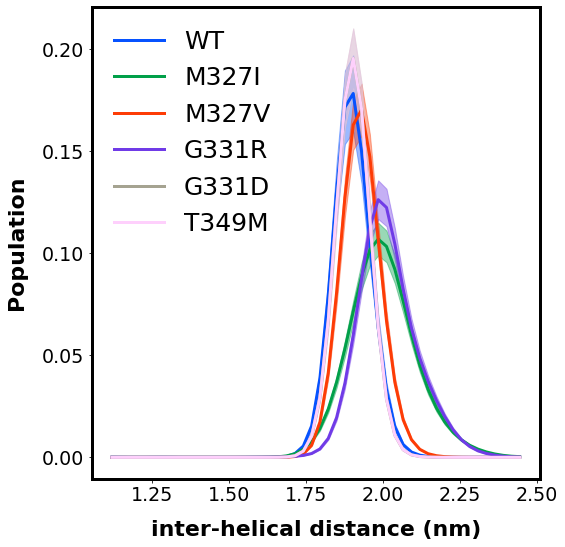

In [243]:
y1 = gaussian_filter1d(center_freq, 1.0)
plot_wError_Range(edges[:-1], y1, y1*0.105, "#0652ff", "WT")

y2 = gaussian_filter1d(m327i_freq, 1.0)
plot_wError_Range(edges[:-1], y2, y2*0.075, "#01a049", "M327I")

y3 = gaussian_filter1d(m327v_freq, 1.0)
plot_wError_Range(edges[:-1], y3, y3*0.075, "#fd3c06", "M327V")

y4 = gaussian_filter1d(g331r_freq, 1.0)
plot_wError_Range(edges[:-1], y4, y4*0.075, "#703be7", "G331R")

y5 = gaussian_filter1d(g331d_freq, 1.0)
plot_wError_Range(edges[:-1], y5, y5*0.075, "#a5a391", "G331D")

y6 = gaussian_filter1d(t349m_freq, 1.0)
plot_wError_Range(edges[:-1], y5, y6*0.075, "#fed0fc", "T349M")

plt.xlabel("inter-helical distance (nm)")
plt.ylabel("Population")
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig("/Users/singhs15/work/mskcc/menin/wt-mutant-all-helical-dist.png",dpi=300)

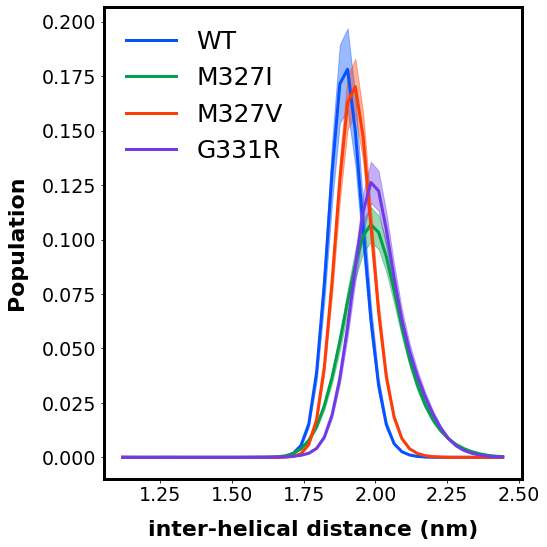

In [244]:
y1 = gaussian_filter1d(center_freq, 1.0)
plot_wError_Range(edges[:-1], y1, y1*0.105, "#0652ff", "WT")

y2 = gaussian_filter1d(m327i_freq, 1.0)
plot_wError_Range(edges[:-1], y2, y2*0.075, "#01a049", "M327I")

y3 = gaussian_filter1d(m327v_freq, 1.0)
plot_wError_Range(edges[:-1], y3, y3*0.075, "#fd3c06", "M327V")

y4 = gaussian_filter1d(g331r_freq, 1.0)
plot_wError_Range(edges[:-1], y4, y4*0.075, "#703be7", "G331R")

# y5 = gaussian_filter1d(g331d_freq, 1.0)
# plot_wError_Range(edges[:-1], y5, y5*0.075, "#a5a391", "G331D")

# y6 = gaussian_filter1d(t349m_freq, 1.0)
# plot_wError_Range(edges[:-1], y5, y6*0.075, "#fed0fc", "T349M")

plt.xlabel("inter-helical distance (nm)")
plt.ylabel("Population")
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig("/Users/singhs15/work/mskcc/menin/wt-mutant-major-helical-dists.png",dpi=300)

array([0.11499132, 0.11306508, 0.11268858, ..., 0.12219054, 0.11716429,
       0.11471365], dtype=float32)

In [175]:
counts, edges = np.histogram(center_dists, bins=50, range=(1.12, 2.5))
center_freq = counts / np.sum(counts)

counts, edges = np.histogram(wt_apo_dists, bins=50, range=(1.12, 2.5))
wt_freq = counts / np.sum(counts)

counts, edges = np.histogram(wt_sndx_dists, bins=50, range=(1.12, 2.5))
wt_sndx_freq = counts / np.sum(counts)

counts, edges = np.histogram(m327i_sndx_dists, bins=50, range=(1.12, 2.77))
m327i_sndx_freq = counts / np.sum(counts)

counts, edges = np.histogram(g331r_sndx_dists, bins=50, range=(1.12, 2.75))
g331r_sndx_freq = counts / np.sum(counts)



findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu


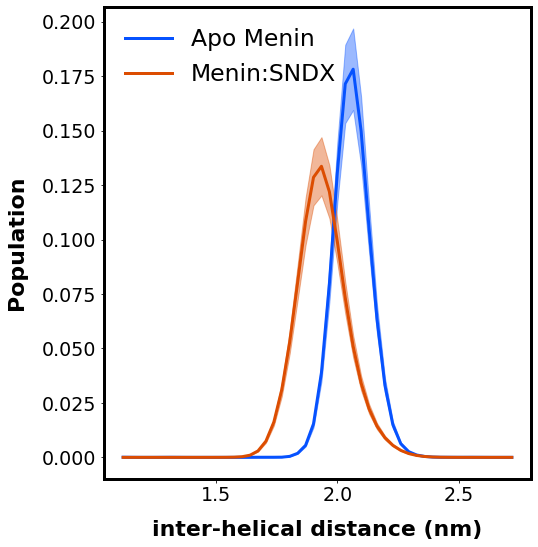

In [186]:
y6 = gaussian_filter1d(center_freq, 1.0)
plot_wError_Range(edges[:-1], y6, y6*0.105, "#0652ff", "Apo Menin")
# y1 = gaussian_filter1d(wt_freq, 1.0)
# plt.plot(edges[:-1], y1)
# y2 = gaussian_filter1d(m327i_freq, 1.0)
# plt.plot(edges[:-1], y2)
# y3 = gaussian_filter1d(m327v_freq, 1.0)
# plt.plot(edges[:-1], y3)
# y4 = gaussian_filter1d(g331r_freq, 1.0)
# plt.plot(edges[:-1], y4)
# # y5 = gaussian_filter1d(g331d_freq, 1.0)
# # plt.plot(edges[:-1], y5)
# # y5 = gaussian_filter1d(t349m_freq, 1.0)
# # plt.plot(edges[:-1], y5)
# y5 = gaussian_filter1d(wt_sndx_freq, 1.0)
# plt.plot(edges[:-1], y5)
y5 = gaussian_filter1d(m327i_sndx_freq, 1.0)
plot_wError_Range(edges[:-1], y5, y5*0.10, "#dc4d01", "Menin:SNDX")
# y5 = gaussian_filter1d(g331r_sndx_freq, 1.0)
# plt.plot(edges[:-1], y5)
plt.xlabel("inter-helical distance (nm)")
plt.ylabel("Population")
plt.legend(frameon=False, fontsize=23.5)
plt.tight_layout()
plt.savefig("/Users/singhs15/work/mskcc/menin/apo-sndx-helical-dist.png",dpi=300)

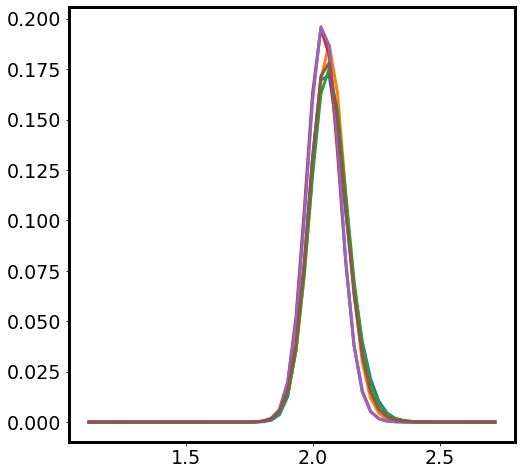

In [179]:
y1 = gaussian_filter1d(wt_freq, 1.0)
plt.plot(edges[:-1], y1)
y2 = gaussian_filter1d(m327i_freq, 1.0)
plt.plot(edges[:-1], y2)
y3 = gaussian_filter1d(m327v_freq, 1.0)
plt.plot(edges[:-1], y3)
y4 = gaussian_filter1d(g331r_freq, 1.0)
plt.plot(edges[:-1], y4)
y5 = gaussian_filter1d(g331d_freq, 1.0)
plt.plot(edges[:-1], y5)
# y5 = gaussian_filter1d(t349m_freq, 1.0)
# plt.plot(edges[:-1], y5)
# y5 = gaussian_filter1d(wt_sndx_freq, 1.0)
# plt.plot(edges[:-1], y5)
# y5 = gaussian_filter1d(m327i_sndx_freq, 1.0)
# plt.plot(edges[:-1], y5)
# y5 = gaussian_filter1d(g331r_sndx_freq, 1.0)
# plt.plot(edges[:-1], y5)
y6 = gaussian_filter1d(center_freq, 1.0)
plt.plot(edges[:-1], y6)